# 1. Imports, Cleaning and EDA

## 1.1. Imports

In [1]:
from pySimFinLIB import pySimFin
import pandas as pd
import seaborn as sns
from simfin.names import *
import matplotlib.pyplot as plt
import requests
from dotenv import load_dotenv
import os
import pandas as pd

## 1.2 Data Cleaning

In [2]:
ticker = 'AAPL'
startDate = '2022-01-01'
endDate = '2023-01-01'

In [3]:
psf = pySimFin()

In [4]:
infoDF = psf.getCompanyInfo(ticker)
companyDF = psf.getCompanyList()
pricesDF = psf.getStockPrices(ticker,startDate,endDate)

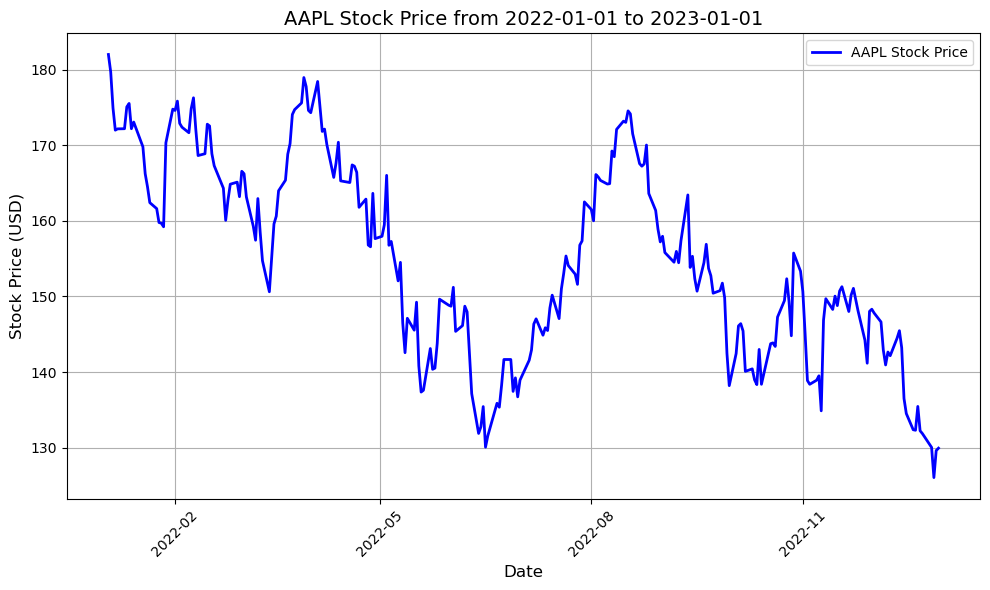

In [5]:
psf.plotFinancialIndex(ticker,startDate,endDate)

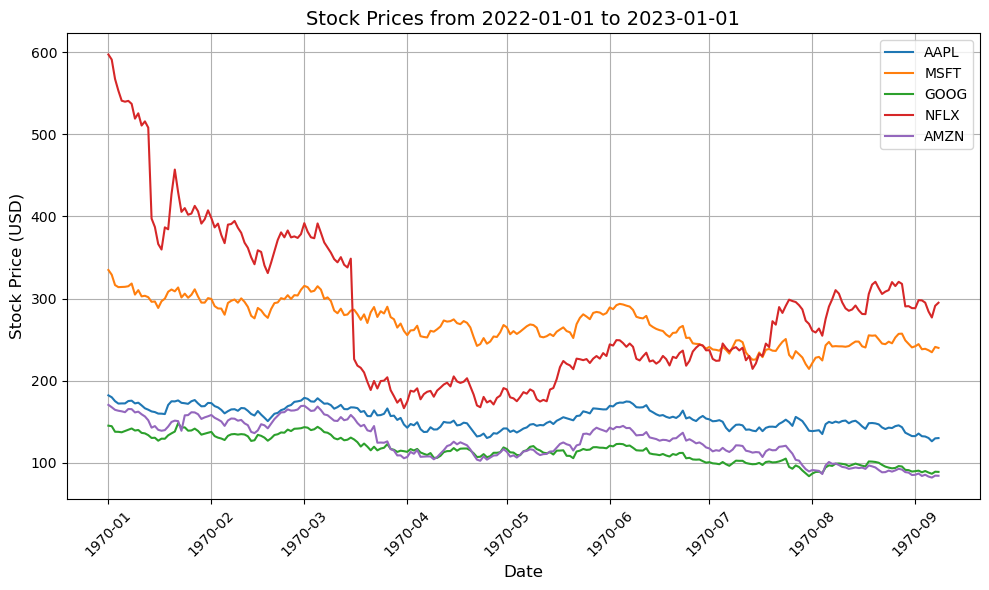

In [8]:
selected_stocks = ['AAPL', 'MSFT', 'GOOG','NFLX','AMZN']
from matplotlib import dates as mdates

def plotMultipleStocks(selected_stocks, startDate, endDate):
    plt.figure(figsize=(10, 6))

    # Loop over the stock data and plot each stock
    for ticker in selected_stocks:
        stock_data = psf.getStockPrices(ticker,startDate,endDate)

        # Plot the stock's 'Last Closing Price' or any other price column
        plt.plot(stock_data['Date'], stock_data['Last Closing Price'], label=ticker)

    # Set plot labels and title
    plt.title(f"Stock Prices from {startDate} to {endDate}", fontsize=14)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Stock Price (USD)', fontsize=12)
    plt.legend()  # Show legend to differentiate stocks
    plt.grid(True)

    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Monthly ticks
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Show Year-Month on x-axis
    
    
    # Rotate the x-ticks for better readability
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plotMultipleStocks(selected_stocks, startDate, endDate)

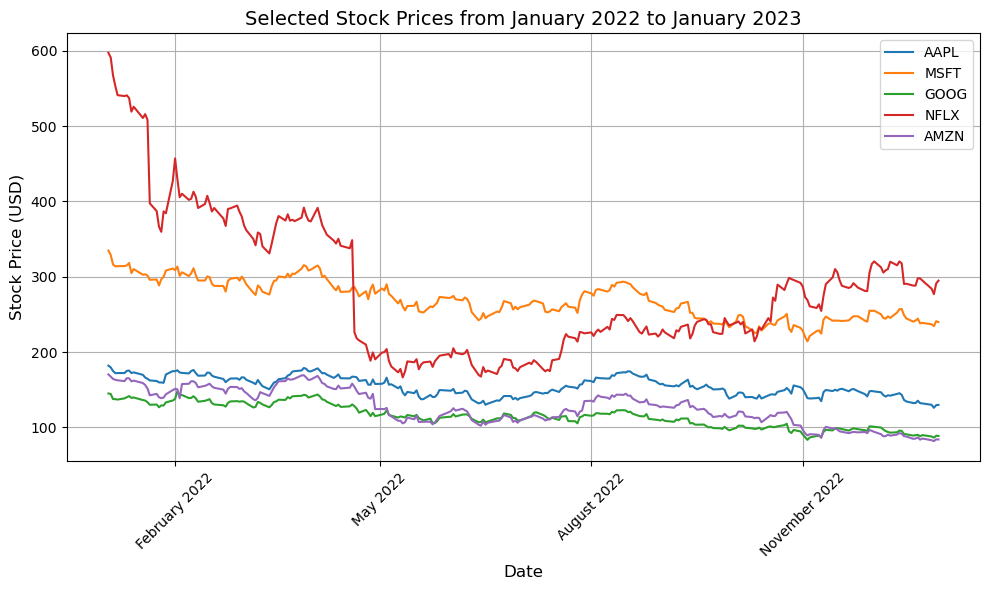

In [19]:
import matplotlib.dates as mdates
import pandas as pd
from datetime import datetime

def plotMultipleStocks(selected_stocks, startDate, endDate):
    plt.figure(figsize=(10, 6))

    # Loop over the stock data and plot each stock
    for ticker in selected_stocks:
        stock_data = psf.getStockPrices(ticker, startDate, endDate)

        # Ensure 'Date' is in datetime format
        stock_data['Date'] = pd.to_datetime(stock_data['Date'], errors='coerce')  # This will convert invalid dates to NaT (Not a Time)

        # Drop rows where the Date is NaT (invalid)
        stock_data = stock_data.dropna(subset=['Date'])

        # Plot the stock's 'Last Closing Price' or any other price column
        plt.plot(stock_data['Date'], stock_data['Last Closing Price'], label=ticker)


    startDate = datetime.strptime(startDate, '%Y-%m-%d') 
    endDate = datetime.strptime(endDate, '%Y-%m-%d') 

    plt.title(f"Selected Stock Prices from {startDate.strftime('%B %Y')} to {endDate.strftime('%B %Y')}", fontsize=14)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Stock Price (USD)', fontsize=12)
    plt.legend()  # Show legend to differentiate stocks
    plt.grid(True)
    
    # Set x-axis locator for quarterly ticks (every 3 months)
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Quarterly ticks (every 3 months)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%B %Y'))  # Show Year-Quarter on x-axis

    # Rotate the x-ticks for better readability
    plt.xticks(rotation=45)
    
    # Adjust layout for better spacing
    plt.tight_layout()
    plt.show()

plotMultipleStocks(selected_stocks, startDate, endDate)